In [118]:
import pandas as pd

In [119]:
import warnings
# Ignore all warningsThis prevents the program from displaying warnings about future version changes, resulting in cleaner and more visually appealing output.
warnings.filterwarnings("ignore", category=FutureWarning)

In [120]:
#The `make_graph` function means using Matplotlib to generate static graphs.
import matplotlib.pyplot as plt

def make_graph(stock_data, revenue_data, stock):
    stock_data_specific = stock_data[stock_data.Date <= '2024-12-31']
    revenue_data_specific = revenue_data[revenue_data.Date <= '2024-12-31']

    fig, axes = plt.subplots(2, 1, figsize=(12, 8), sharex=True)

    # Stock price
    axes[0].plot(pd.to_datetime(stock_data_specific.Date), stock_data_specific.Close.astype("float"), label="Share Price", color="blue")
    axes[0].set_ylabel("Price ($US)")
    axes[0].set_title(f"{stock} - Historical Share Price")

    # Revenue
    axes[1].plot(pd.to_datetime(revenue_data_specific.Date), revenue_data_specific.Revenue.astype("float"), label="Revenue", color="green")
    axes[1].set_ylabel("Revenue ($US Millions)")
    axes[1].set_xlabel("Date")
    axes[1].set_title(f"{stock} - Historical Revenue")

    plt.tight_layout()
    plt.savefig("data_of_tesla.png", dpi=300, bbox_inches='tight')
    plt.show()

In [121]:
# Read locally stored Tesla stock price data (daily data)& Tesla quarterly revenue data
stock_path = r"D:\GITHUB\data\tesla_stock.csv"
revenue_path = r"D:\GITHUB\data\tesla_revenue.csv"

tesla_data = pd.read_csv(stock_path)
tesla_revenue = pd.read_csv(revenue_path)


In [122]:
# Cleaning stock price data

# Use the replica for subsequent cleaning, and retain tesla_data,tesla_revenue as a backup of the original data.
tesla_data_new = tesla_data.copy()
# Convert the date column to datetime for easier filtering and sorting by time later.
tesla_data_new["Date"]=pd.to_datetime(tesla_data_new["Date"])


In [123]:
# Cleaning revenue data

tesla_revenue_new = tesla_revenue.copy()
tesla_revenue_new["Date"]=pd.to_datetime(tesla_revenue_new["Date"])

# Simplify the original column name "Tesla Quarterly Revenue" to "Revenue" for easier and more consistent use later.
tesla_revenue_new = tesla_revenue_new.rename(
    columns={"Tesla Quarterly Revenue": "Revenue"}
)

# Clean the Revenue column:
# - Remove commas and dollar signs from amounts, keeping only numeric characters
# - Delete rows with missing values
# - Filter out rows where Revenue is still an empty string
# - Convert Revenue to float for easier subsequent calculations and plotting.
tesla_revenue_new["Revenue"] = tesla_revenue_new['Revenue'].str.replace(',|\$',"",regex=True)
tesla_revenue_new.dropna(subset=["Revenue"], inplace=True)
tesla_revenue_new = tesla_revenue_new[tesla_revenue_new['Revenue'] != ""]
tesla_revenue_new["Revenue"] = tesla_revenue_new["Revenue"].astype(float)


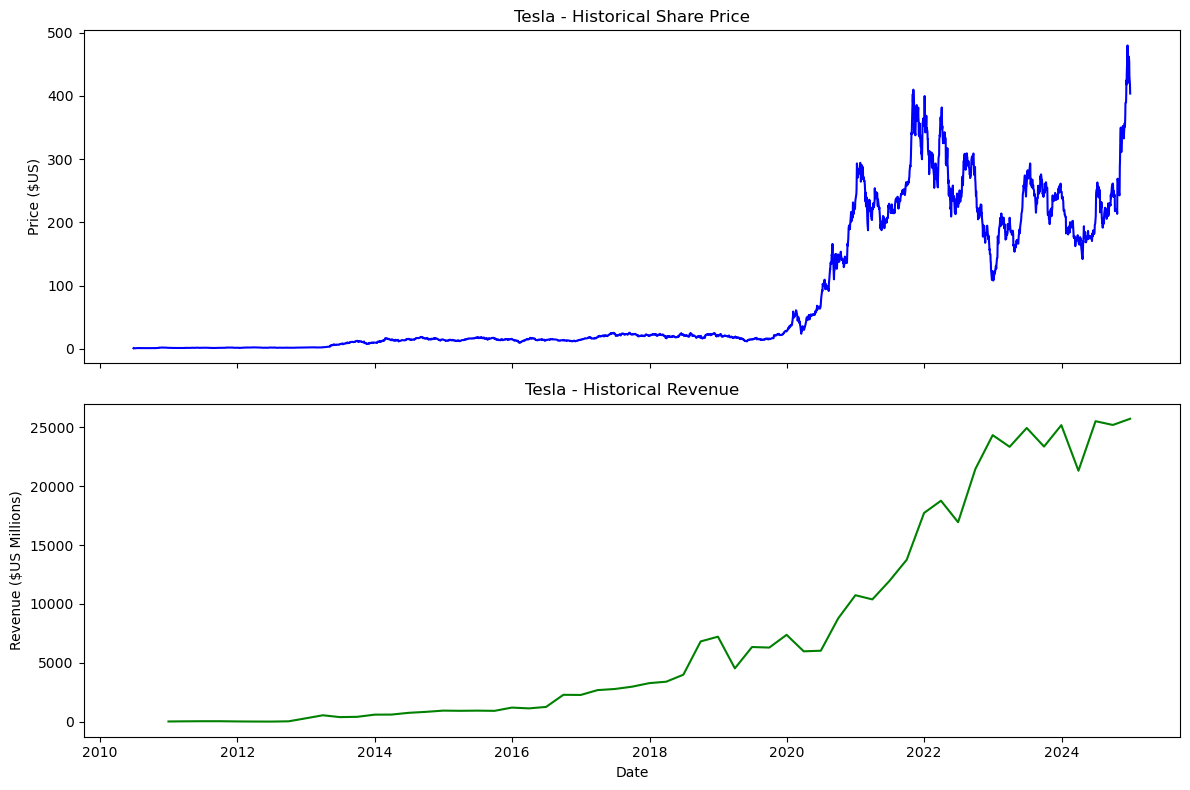

<Figure size 640x480 with 0 Axes>

In [117]:
#Plot Tesla Stock&Revenue Graph
end_date = "2024-12-31"
tesla_data_until_december = tesla_data_new[tesla_data_new["Date"] <= end_date]
tesla_revenue_until_december = tesla_revenue_new[tesla_revenue_new["Date"] <= end_date]

make_graph(tesla_data_until_december,tesla_revenue_until_december, "Tesla")
